In [1]:
%load_ext autoreload
%autoreload 2

# Multiple Correpondance Analysis of Experiments

In [2]:
import pandas as pd
import numpy as np
import typing

import prince

import plotnine as p9

In the first toy example, we're going to line up a set of experiments and compare the differential gene expression results for significant genes.

We're interested in knowing the "correspondance" between these studies.

In [3]:
def calculate_mca(dframe : pd.DataFrame) -> prince.MCA:
    mca = prince.MCA(
                    n_components=2,
                    n_iter=3,
                    copy=True,
                    check_input=True,
                    engine='auto',
                    random_state=42
    )

    return mca.fit(dframe) 

def mca_to_coordinates(dframe : pd.DataFrame, mca : prince.MCA) -> pd.DataFrame:
    dframe_coords = mca.column_coordinates(dframe).reset_index()
    dframe_coords.columns = ["Factor", "x", "y"]
    dframe_coords["AssociationType"] = [x.split("_")[0] for x in dframe_coords["Factor"].tolist()]
    dframe_coords["Value"] = ["_".join(x.split("_")[-1:]) for x in dframe_coords["Factor"].tolist()]
    dframe_coords.sort_values("x")
    
    return dframe_coords

def plot_mca_coords(dframe: pd.DataFrame, jitter_x=0, jitter_y=0):
    p9.options.figure_size = 10,10
    gg = (p9.ggplot(dframe) +
        p9.aes(x='x', y='y', 
               fill="Factor") +
        p9.geom_jitter(size=3, height=jitter_y, width=jitter_x) 
    )
    return gg

As a first toy example, we have a set of genes that are differentially expressed in 4 differential expression experiments.

We're interested in knowing which Genes/Experiment tend to correspond.

## Toy Example 1

Imagine we take a set of differential expression studies and compare the direction of changes per gene.

In [4]:
dframe_toy = pd.DataFrame({
    'Gene' : ["PTEN", "SYNGAP1"],
    'Experiment1' : ["UP", "DOWN"],
    'Experiment2' : ["UP", "UP"  ],
    'Experiment3' : ["UP", "DOWN"],
    'Experiment4' : ["DOWN", "DOWN"],
})


dframe_mca = dframe_toy
display(dframe_toy)

,Gene,Experiment1,Experiment2,Experiment3,Experiment4
0,PTEN,UP,UP,UP,DOWN
1,SYNGAP1,DOWN,UP,DOWN,DOWN


Let's plot the first example:

'Coordinates'

,Factor,x,y,AssociationType,Value
0,Gene_PTEN,1.000000e+00,1.0,Gene,PTEN
1,Gene_SYNGAP1,-1.000000e+00,1.0,Gene,SYNGAP1
2,Experiment1_DOWN,-1.000000e+00,1.0,Experiment1,DOWN
3,Experiment1_UP,1.000000e+00,1.0,Experiment1,UP
4,Experiment2_UP,1.014654e-17,1.0,Experiment2,UP
5,Experiment3_DOWN,-1.000000e+00,1.0,Experiment3,DOWN
6,Experiment3_UP,1.000000e+00,1.0,Experiment3,UP
7,Experiment4_DOWN,1.014654e-17,1.0,Experiment4,DOWN


'Visualization for variants:'

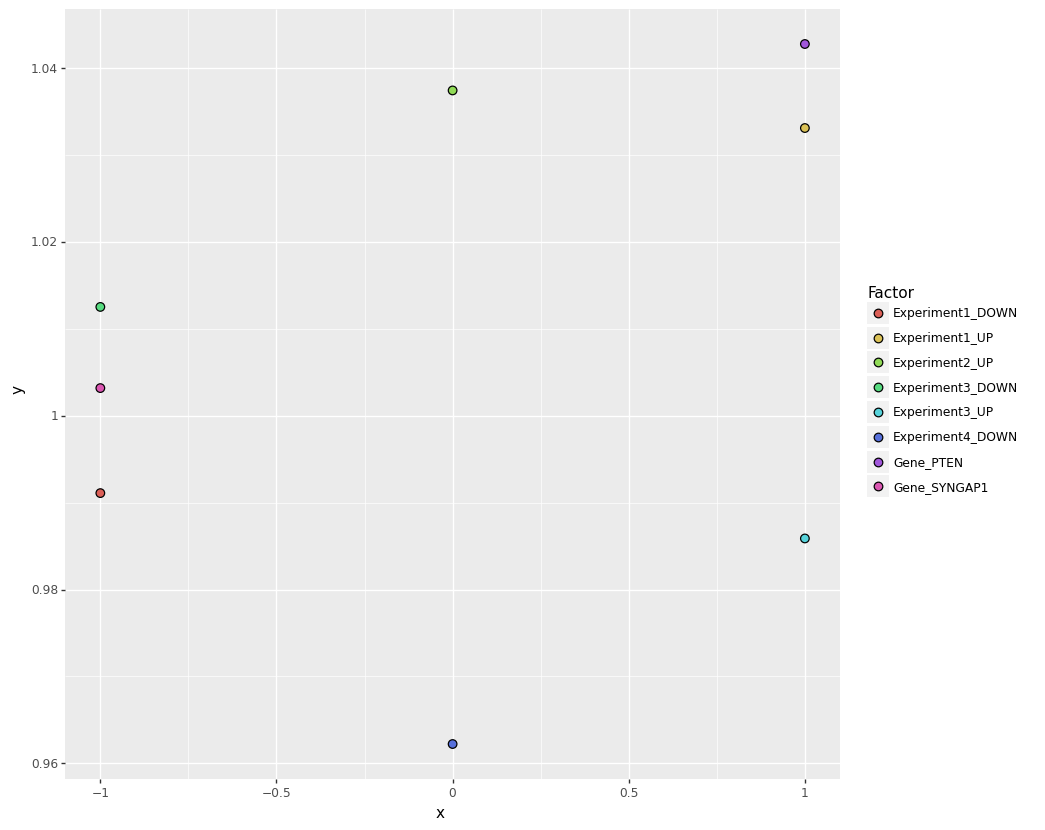

<ggplot: (8738985299694)>

In [5]:
## Apply MCA, convert to coordinates
dframe_coords = mca_to_coordinates(dframe_toy,
                                  calculate_mca(dframe_toy)
                )

## X/Y coordinates
display("Coordinates", dframe_coords)


## Visualize
display("Visualization for variants:")
display( plot_mca_coords(dframe_coords, jitter_x=0, jitter_y=0.05) )

(Ignore the y-axxis here, it's only Jitter)

What the coordinates on the x-axis tells us is that Experiment2 (UP) and and Experiment4 (DOWN) corresponds to Genes PTEN and SYNGAP1 because their coordinates end up between the gene factor points.

Experiment1 (UP) seems more specific to PTEN. But that's just an illustration.

## Toy example 2

What if we added known presence of variance to this?

In [6]:
### TOY EXAMPLE ###
dframe_toy = pd.DataFrame({
    'Observation' : ["PTEN", "SCN2A", "Variant1", "Variant2", "Variant3", "PELEVEN" ],
    'Experiment1' : ["UP",   "DOWN",     "Y",        "Y",        "N",       "UP" ],
    'Experiment2' : ["UP",   "DOWN"  ,   "N",        "N",        "Y",       "UP" ],
    'Experiment3' : ["UP",   "DOWN",     "Y",        "Y",        "N",       "UP" ],
    'Experiment4' : ["DOWN", "DOWN",     "Y",        "N",        "N",       "UP" ],
})

'Source data'

,Observation,Experiment1,Experiment2,Experiment3,Experiment4
0,PTEN,UP,UP,UP,DOWN
1,SCN2A,DOWN,DOWN,DOWN,DOWN
2,Variant1,Y,N,Y,Y
3,Variant2,Y,N,Y,N
4,Variant3,N,Y,N,N
5,PELEVEN,UP,UP,UP,UP


'Coordinates'

,Factor,x,y,AssociationType,Value
0,Observation_PELEVEN,-1.0,-4.367520e-16,Observation,PELEVEN
1,Observation_PTEN,-1.0,-2.619452e-17,Observation,PTEN
2,Observation_SCN2A,-1.0,4.112749e-15,Observation,SCN2A
3,Observation_Variant1,1.0,-1.273592e+00,Observation,Variant1
4,Observation_Variant2,1.0,-6.986717e-01,Observation,Variant2
5,Observation_Variant3,1.0,1.972263e+00,Observation,Variant3
6,Experiment1_DOWN,-1.0,4.112749e-15,Experiment1,DOWN
7,Experiment1_N,1.0,1.972263e+00,Experiment1,N
8,Experiment1_UP,-1.0,-2.314733e-16,Experiment1,UP
9,Experiment1_Y,1.0,-9.861316e-01,Experiment1,Y


'Visualization for variants:'

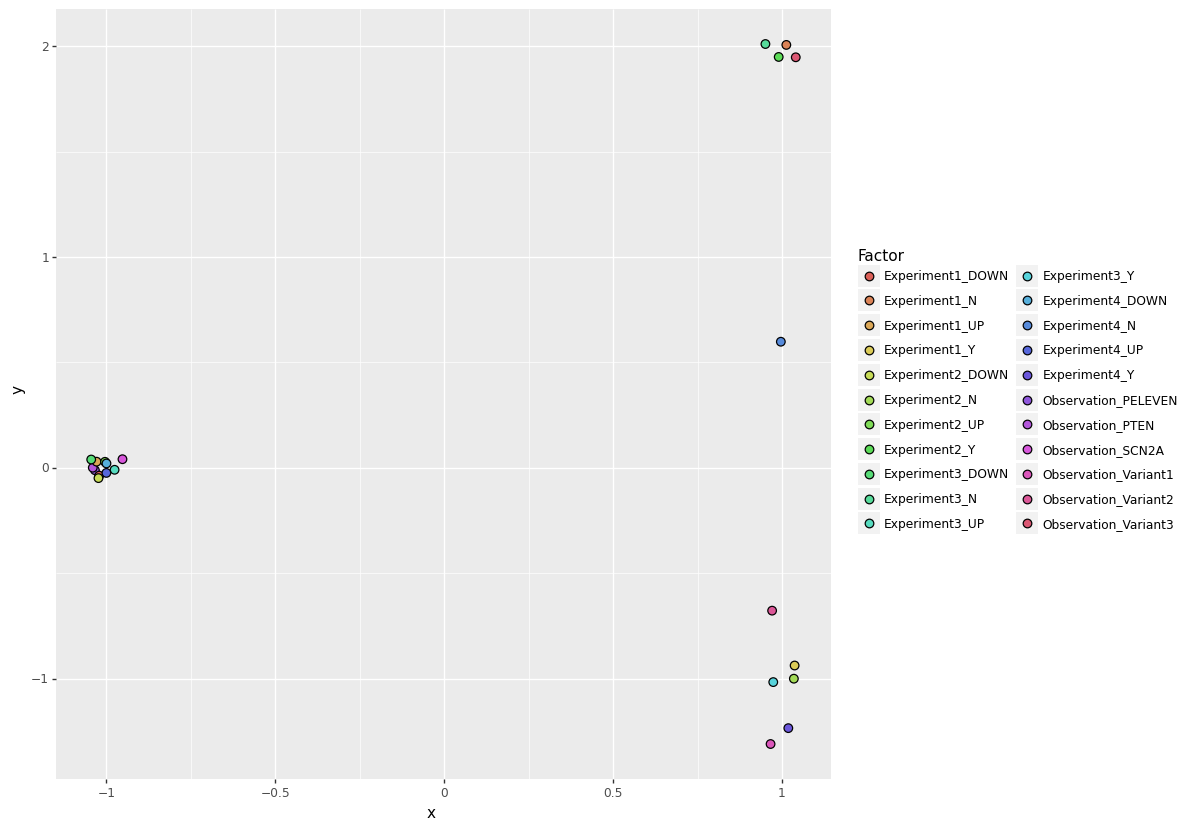

<ggplot: (8738985299700)>

'Visualization for variants (Just observations):'

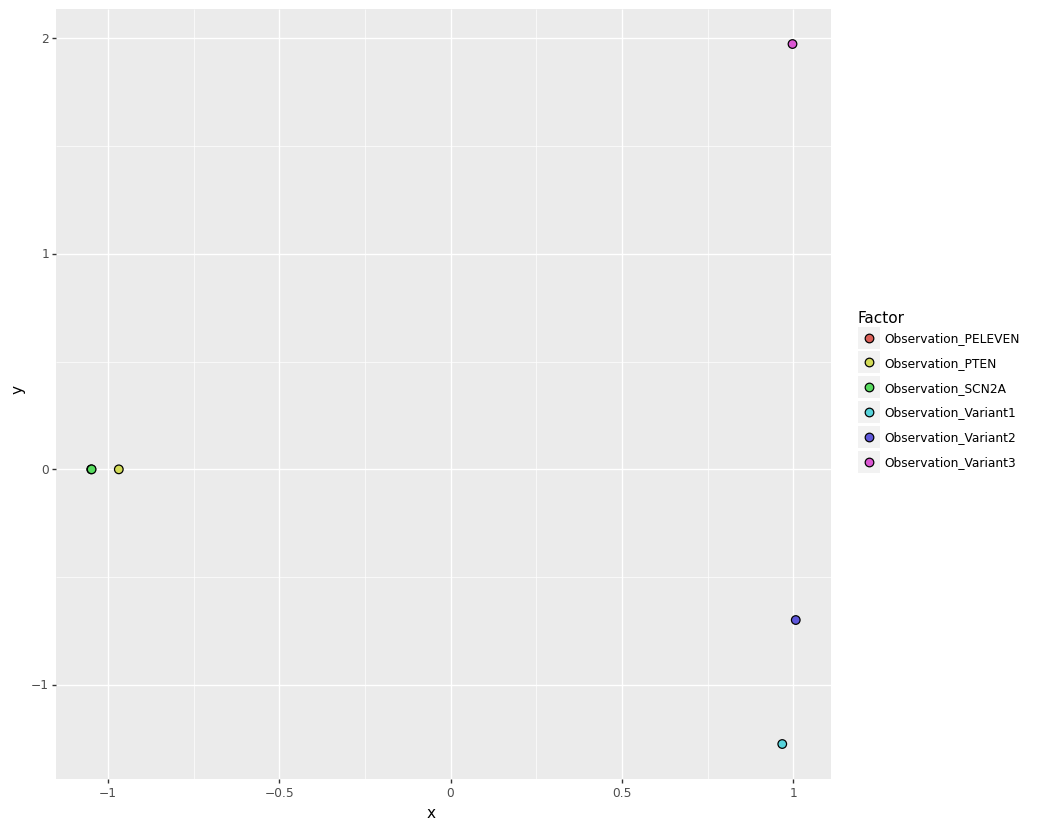

<ggplot: (8738985280178)>

In [7]:
display("Source data", dframe_toy)

dframe_coords = mca_to_coordinates(dframe_toy,
                                  calculate_mca(dframe_toy)
                )

display("Coordinates", dframe_coords)

display("Visualization for variants:")
display( plot_mca_coords(dframe_coords, jitter_x=0.05, jitter_y=0.05) )


display("Visualization for variants (Just observations):")
display( plot_mca_coords(dframe_coords.query("AssociationType == 'Observation'"), jitter_x=0.05) )

The plot with everything is a bit noisy, but if we subset just for observations, we see:
 * Variant1 and Variant2 have good correspondance
 * PTEN and totally-real-gene PELEVEN are close together than SYNGAP1. (Might need to look at the coordinate table)

## Toy example 3

We can add all sorts of things in the comparison.
E.g.: Substitute genes for pathways, and variants for Haplotypes.
    

In [8]:
dframe_toy = pd.DataFrame({
    'Observation' : ["Pathway1", "Pathway2", "Pathway3", "Pathway4", "Hapl1", "Hapl2", "Hapl3", "Hapl4" ],
    'Experiment1' : ["KO",   "DOWN",     "DOWN",         "KO",        "Y",        "N",  "N",    "Y" ],
    'Experiment2' : ["UP",   "KO",       "DOWN",         "KO",          "N",        "Y",  "N",    "Y" ],
    'Experiment3' : ["KO",   "KO",       "KO",           "KO",            "Y",        "N",  "N",    "Y" ],
    'Experiment4' : ["DOWN", "DOWN",     "UP",           "KO",            "N",        "N",  "Y",    "N" ],
})

'Source data'

,Observation,Experiment1,Experiment2,Experiment3,Experiment4
0,Pathway1,KO,UP,KO,DOWN
1,Pathway2,DOWN,KO,KO,DOWN
2,Pathway3,DOWN,DOWN,KO,UP
3,Pathway4,KO,KO,KO,KO
4,Hapl1,Y,N,Y,N
5,Hapl2,N,Y,N,N
6,Hapl3,N,N,N,Y
7,Hapl4,Y,Y,Y,N


'Coordinates'

,Factor,x,y,AssociationType,Value
0,Observation_Hapl1,-1.0,-1.136867e+00,Observation,Hapl1
1,Observation_Hapl2,-1.0,5.986239e-01,Observation,Hapl2
2,Observation_Hapl3,-1.0,2.030418e+00,Observation,Hapl3
3,Observation_Hapl4,-1.0,-1.492174e+00,Observation,Hapl4
4,Observation_Pathway1,1.0,3.119354e-16,Observation,Pathway1
5,Observation_Pathway2,1.0,-1.527139e-15,Observation,Pathway2
6,Observation_Pathway3,1.0,-7.288261e-16,Observation,Pathway3
7,Observation_Pathway4,1.0,3.029410e-15,Observation,Pathway4
8,Experiment1_DOWN,1.0,-1.127983e-15,Experiment1,DOWN
9,Experiment1_KO,1.0,1.670672e-15,Experiment1,KO


'Visualization for variants:'

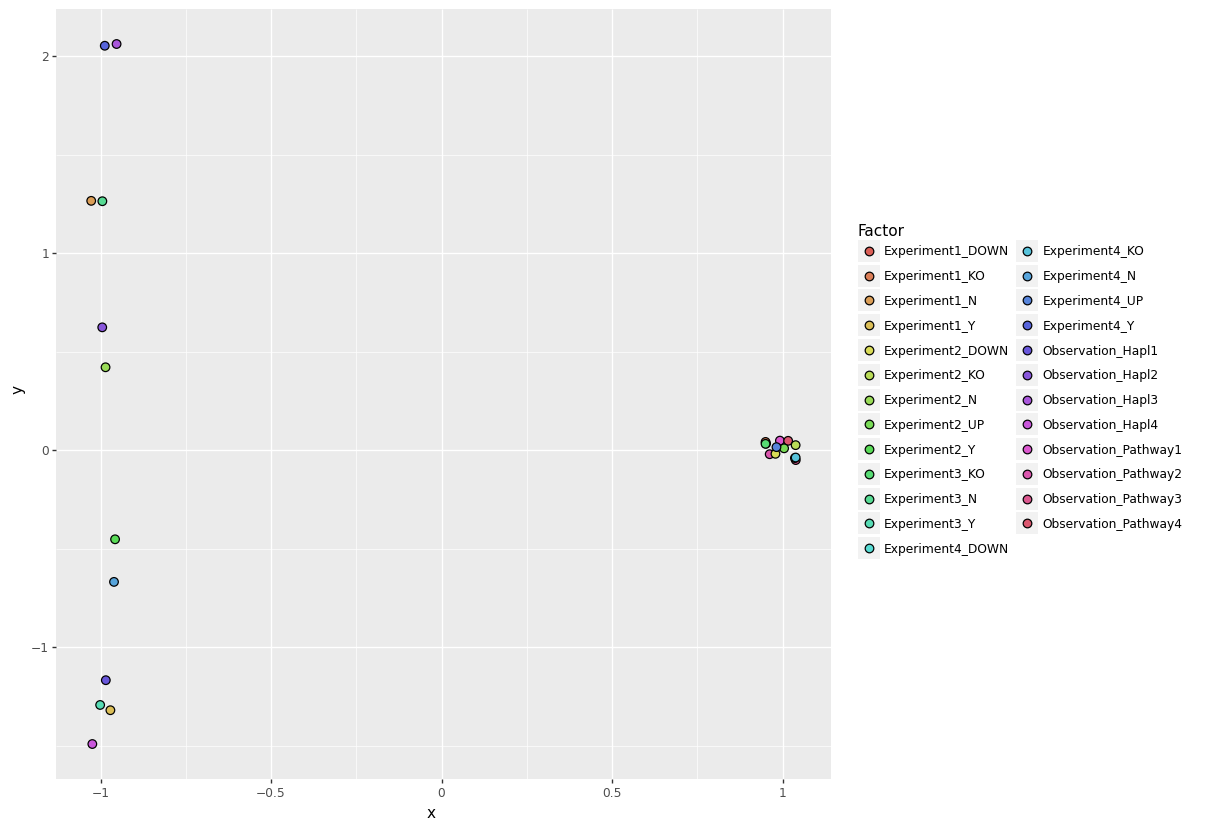

<ggplot: (8738985280022)>

'Visualization for variants (Just observations):'

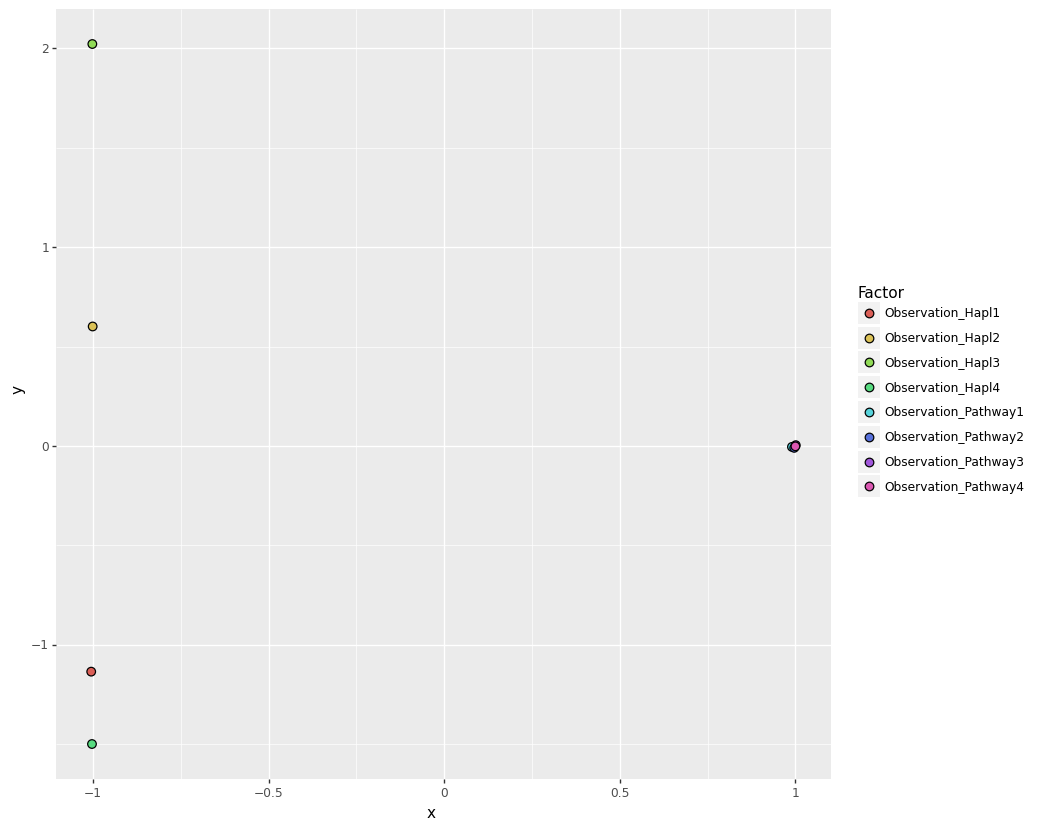

<ggplot: (8738975196660)>

'Zoom on Pathways'

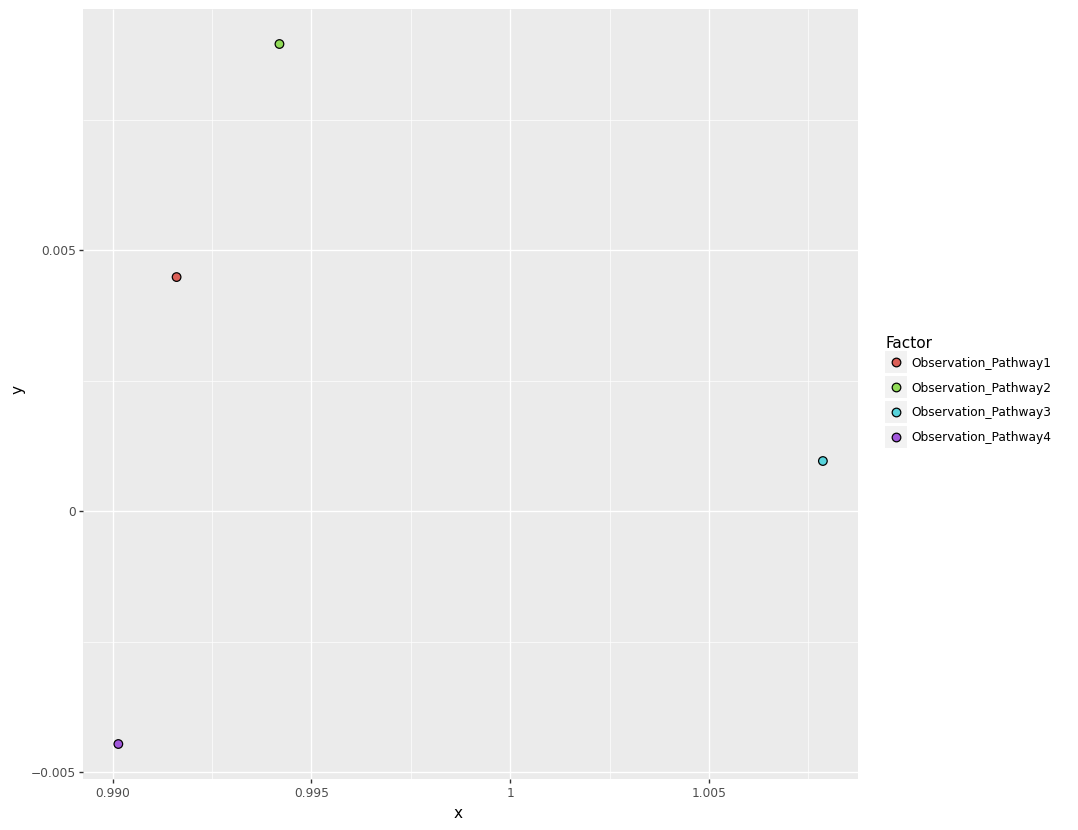

<ggplot: (8738975105326)>

In [9]:
display("Source data", dframe_toy)

dframe_coords = mca_to_coordinates(dframe_toy,
                                  calculate_mca(dframe_toy)
                )

display("Coordinates", dframe_coords)

display("Visualization for variants:")
display( plot_mca_coords(dframe_coords, jitter_x=0.05, jitter_y=0.05) )


display("Visualization for variants (Just observations):")
display( plot_mca_coords(dframe_coords.query("AssociationType == 'Observation'"), jitter_x=0.01, jitter_y=0.01) )

display("Zoom on Pathways")
display( plot_mca_coords(dframe_coords.query("AssociationType == 'Observation' and x > 0"), jitter_x=0.01, jitter_y=0.01) )



Observations:

* Haplotypes 1 and 4 correspond more closely while 2 and 3 are more similar together.
* When we zoom in, we see Pathway 4 (all KOs) is the outlier.